In [10]:
import torch
from torch.utils.data import Dataset, DataLoader, Sampler, Subset
import sys, os
import numpy as np
import time
import h5py

sys.path.append('/user_data/mmhender/imStat/code/')
from utils import roi_utils, nsd_utils, default_paths, dataset_utils


In [11]:
# roi_names = ['V1','V2','RSC']
roi_names = ''
for ss in np.arange(1,9):
    ds = dataset_utils.nsd_dataset(subject=ss, roi_names = roi_names, load_edges=True, \
                     load_images=True, load_voxels=True, grayscale=True, load_each_time=True)
    print('subject %d'%ss)
    ds_trn, ds_val = dataset_utils.get_trn_val_split(ds)
    print([len(ds), len(ds_trn), len(ds_val)])
    print(ds.num_vox)

subject 1
[30000, 27000, 3000]
19738
subject 2
[30000, 27000, 3000]
18952
subject 3
[24000, 21629, 2371]
20001
subject 4
[22500, 20312, 2188]
17090
subject 5
[30000, 27000, 3000]
18514
subject 6
[24000, 21629, 2371]
21684
subject 7
[30000, 27000, 3000]
16475
subject 8
[22500, 20312, 2188]
18388


In [12]:
ds = dataset_utils.nsd_dataset(subject=7, roi_names = ['V1','V2','RSC'], load_edges=True, \
                     load_images=True, load_voxels=True, grayscale=False, image_preproc_fn = my_fn, \
                               load_each_time=True)
ds_trn, ds_val = dataset_utils.get_trn_val_split(ds)

In [4]:
def my_fn(image_batch):

    return (-1)*image_batch

In [6]:
ds.image_preproc_fn

<function __main__.my_fn(image_batch)>

In [6]:
batch_size=5
n_batches=2
dl_trn = DataLoader(ds_trn, batch_size=batch_size, shuffle=False, num_workers=0)
dl_iter = iter(dl_trn)
total_st = time.time()
for ii in range(n_batches):
    this_st = time.time()
    item_1 = dl_iter.next()
    elapsed = time.time() - this_st;
    print('elapsed: %.5f s'%elapsed)

elapsed = time.time() - total_st;
print('elapsed: %.5f s'%elapsed)

elapsed: 0.39703 s
elapsed: 0.26895 s
elapsed: 0.66837 s


In [9]:
item_1['edge_map_data'].shape

torch.Size([5, 1, 240, 240])

In [40]:
len(np.unique(item_1['edge_map_data']))

40810

In [35]:
batch_size=5
n_batches=2
ranges_to_get = [np.arange(bb*batch_size,(bb+1)*batch_size) for bb in range(n_batches)] 
total_st = time.time()
for ii, rang in enumerate(ranges_to_get):
    this_st = time.time()
    print(rang)
    item_2 = ds_trn[rang]  
    elapsed = time.time() - this_st;
    print('elapsed: %.5f s'%elapsed)

elapsed = time.time() - total_st;
print('elapsed: %.5f s'%elapsed)

[0 1 2 3 4]
elapsed: 0.32351 s
[5 6 7 8 9]
elapsed: 0.24917 s
elapsed: 0.57397 s


In [37]:
item_1['image_data'][3,0,50,50]

tensor(0.6313)

In [38]:
item_2['image_data'][3,0,50,50]

0.63129723

In [13]:
ds = dataset_utils.nsd_dataset(subject=6, roi_names = ['V1','V2','RSC'], load_edges=True, \
                     load_images=True, load_voxels=True, image_preproc_fn = None, load_each_time=True)
ds_trn, ds_val = dataset_utils.get_trn_val_split(ds)

In [16]:
item_1['edge_map_data'].shape

torch.Size([5, 1, 240, 240])

In [14]:
batch_size=5
n_batches=2
dl_trn = DataLoader(ds_trn, batch_size=batch_size, shuffle=False, num_workers=0)
dl_iter = iter(dl_trn)
total_st = time.time()
for ii in range(n_batches):
    this_st = time.time()
    item_1 = dl_iter.next()
    elapsed = time.time() - this_st;
    print('elapsed: %.5f s'%elapsed)

elapsed = time.time() - total_st;
print('elapsed: %.5f s'%elapsed)

elapsed: 1.15048 s
elapsed: 1.01232 s
elapsed: 2.16483 s


In [14]:
item_1['image_data'].shape

torch.Size([5, 1, 240, 240])

In [18]:
# item_1['image_data']

In [19]:
batch_size=5
n_batches=2
ranges_to_get = [np.arange(bb*batch_size,(bb+1)*batch_size) for bb in range(n_batches)] 
total_st = time.time()
for ii, rang in enumerate(ranges_to_get):
    this_st = time.time()
    print(rang)
    item_2 = ds_trn[rang]  
    elapsed = time.time() - this_st;
    print('elapsed: %.5f s'%elapsed)

elapsed = time.time() - total_st;
print('elapsed: %.5f s'%elapsed)

[0 1 2 3 4]
elapsed: 0.31821 s
[5 6 7 8 9]
elapsed: 0.24204 s
elapsed: 0.56186 s


In [20]:
item_1['image_data'][3,0,50,50]

tensor(0.6313)

In [21]:
item_2['image_data'][3,0,50,50]

0.63129723

In [22]:
item_1['voxel_data'][3,100]

tensor(0.0528)

In [23]:
item_2['voxel_data'][3,100]

0.052753173

In [24]:
batch_size=5
n_batches=2
dl_val = DataLoader(ds_val, batch_size=batch_size, shuffle=False, num_workers=0)
dl_iter = iter(dl_val)
total_st = time.time()
for ii in range(n_batches):
    this_st = time.time()
    item_1 = dl_iter.next()
    elapsed = time.time() - this_st;
    print('elapsed: %.5f s'%elapsed)

elapsed = time.time() - total_st;
print('elapsed: %.5f s'%elapsed)

elapsed: 0.31178 s
elapsed: 0.24053 s
elapsed: 0.55375 s


In [25]:
batch_size=5
n_batches=2
ranges_to_get = [np.arange(bb*batch_size,(bb+1)*batch_size) for bb in range(n_batches)] 
total_st = time.time()
for ii, rang in enumerate(ranges_to_get):
    this_st = time.time()
    print(rang)
    item_2 = ds_val[rang]  
    elapsed = time.time() - this_st;
    print('elapsed: %.5f s'%elapsed)

elapsed = time.time() - total_st;
print('elapsed: %.5f s'%elapsed)

[0 1 2 3 4]
elapsed: 0.26362 s
[5 6 7 8 9]
elapsed: 0.24010 s
elapsed: 0.50468 s


In [26]:
item_1['voxel_data'][3,100]

tensor(2.7505)

In [27]:
item_2['voxel_data'][3,100]

2.7504964

In [25]:
ds = dataset_utils.nsd_dataset(subject=1, roi_names = ['V1','V2','RSC'], load_edges=True, \
                     load_images=True, load_voxels=True, load_each_time=False)
ds_trn, ds_val = dataset_utils.get_trn_val_split(ds)

In [26]:
batch_size=10
dl_trn = DataLoader(ds_trn, batch_size=batch_size, shuffle=True)
item = iter(dl_trn).next()

loading voxel data
loading image data
loading edge maps


In [29]:
ds.init_big()
batch_size=10
dl_val = DataLoader(ds_val, batch_size=batch_size, shuffle=True)
item = iter(dl_val).next()

loading voxel data
loading image data
loading edge maps


In [29]:
print(item_1['edge_map_data'].shape)
print(item_1['image_data'].shape)
print(item_1['voxel_data'].shape)

torch.Size([5, 1, 240, 240])
torch.Size([5, 1, 240, 240])
torch.Size([5, 5054])


In [17]:
item = item_1

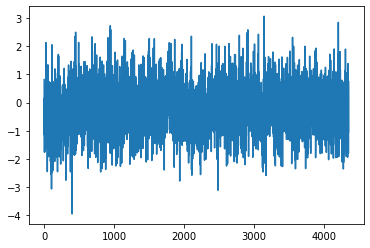

In [18]:
import matplotlib.pyplot as plt
plt.figure();
plt.plot(item['voxel_data'][1,:]);

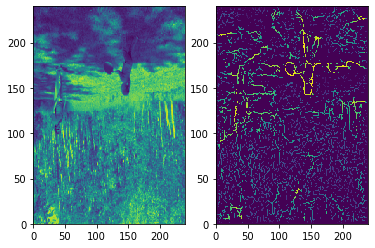

In [19]:

plt.figure();
plt.subplot(1,2,1)
plt.pcolormesh(item['image_data'][0,0,:,:])
plt.subplot(1,2,2)
plt.pcolormesh(item['edge_map_data'][0,0,:,:])